<a href="https://colab.research.google.com/github/bs18b019/Data-science-work/blob/main/Cat_and_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

# define image property
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Generating a data frame which will have file name and level
folder = '/content/drive/MyDrive/data scienec work/dogs-vs-cats/train/train/'
filenames=os.listdir(folder)


categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)



df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})


Creating directory 

In [ ]:
import os

	
# create directories
dataset_home = '/content/drive/MyDrive/data scienec work/dogs-vs-cats/train/'
subdirs = ['new_train/', 'new_test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		os.makedirs(newdir, exist_ok=True)

Adding our testing data to newly created directory

In [ ]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = '/content/drive/MyDrive/data scienec work/dogs-vs-cats/train/train'
for file in os.listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = '/content/drive/MyDrive/data scienec work/dogs-vs-cats/train/new_train/'
	if random() < val_ratio:
		dst_dir = '/content/drive/MyDrive/data scienec work/dogs-vs-cats/train/new_test/'
	if file.startswith('cat'):
		dst = dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dst_dir + 'dogs/'  + file
		copyfile(src, dst)
  

Lets build a cnn model

In [ ]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image_dataset_from_directory
import tensorflow as tf

 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
def imgMap(img, label):
  return (np.asarray(img), label)

# run the test harness for evaluating a model
def run_test_harness():
 

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    trainit = tf.keras.preprocessing.image_dataset_from_directory(
        
      '/content/drive/MyDrive/data scienec work/dogs-vs-cats/train/new_train',
      labels="inferred",
      label_mode='binary',
      color_mode="rgb",
      batch_size=64,
      image_size=(200, 200),
      shuffle=True,
      interpolation="bilinear",
      follow_links=False,)

    # prepare iterators
    '''train_it = datagen.flow_from_directory('/content/drive/MyDrive/data scienec work/dogs-vs-cats/traincr_train',
      class_mode='binary', batch_size=64, target_size=(200, 200))  
    train_it = train_it.map(imgMap)  
    print(train_it)'''

    testit = tf.keras.preprocessing.image_dataset_from_directory(
        
      '/content/drive/MyDrive/data scienec work/dogs-vs-cats/train/new_test',
      labels="inferred",
      label_mode='binary',
      color_mode="rgb",
      batch_size=64,
      image_size=(200, 200),
      shuffle=True,
      interpolation="bilinear",
      follow_links=False,)

    
    '''test_it = datagen.flow_from_directory('/content/drive/MyDrive/data scienec work/dogs-vs-cats/traincr_test',
      class_mode='binary', batch_size=64, target_size=(200, 200))'''
    print(testit)
    
    print(testit)
    print(trainit)
    # fit model
    #history = model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=20, verbose=0)
    history = model.fit(trainit, epochs=10, validation_data=testit, verbose = 1)
    # evaluate model
    _, acc = model.evaluate_generator(testit, steps=len(testit), verbose=1)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Found 18809 files belonging to 2 classes.
Found 6351 files belonging to 2 classes.
<BatchDataset shapes: ((None, 200, 200, 3), (None, 1)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 200, 200, 3), (None, 1)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 200, 200, 3), (None, 1)), types: (tf.float32, tf.float32)>
Epoch 1/10
294/294 [==============================] - 4564s 15s/step - loss: 5384.8256 - accuracy: 0.4937 - val_loss: 0.6932 - val_accuracy: 0.5100
Epoch 2/10
294/294 [==============================] - 631s 2s/step - loss: 0.6932 - accuracy: 0.5043 - val_loss: 0.6933 - val_accuracy: 0.4919
Epoch 3/10
294/294 [==============================] - 625s 2s/step - loss: 0.6931 - accuracy: 0.4967 - val_loss: 0.6933 - val_accuracy: 0.4916
Epoch 4/10
294/294 [==============================] - 619s 2s/step - loss: 0.6930 - accuracy: 0.4972 - val_loss: 0.6933 - val_accuracy: 0.4917
Epoch 5/10
294/294 [==============================] - 624s 2s/step - loss

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


100/100 [==============================] - 72s 708ms/step - loss: 0.6931 - accuracy: 0.5070
> 50.701


We can see how previous model performed

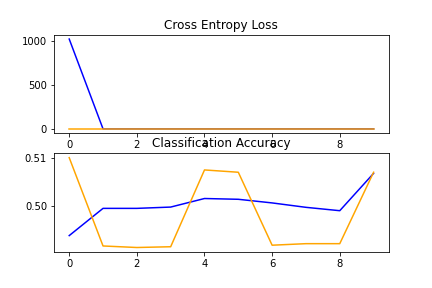

# Lets develope two block vgg model


In [ ]:

	
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

run_test_harness()


Found 18809 files belonging to 2 classes.
Found 6351 files belonging to 2 classes.
<BatchDataset shapes: ((None, 200, 200, 3), (None, 1)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 200, 200, 3), (None, 1)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 200, 200, 3), (None, 1)), types: (tf.float32, tf.float32)>
Epoch 1/10
294/294 [==============================] - 1159s 4s/step - loss: 181395564975523.1562 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5075
Epoch 2/10
294/294 [==============================] - 1113s 4s/step - loss: 0.6932 - accuracy: 0.4955 - val_loss: 0.6931 - val_accuracy: 0.5075
Epoch 3/10
294/294 [==============================] - 1118s 4s/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5075
Epoch 4/10
294/294 [==============================] - 1124s 4s/step - loss: 0.6932 - accuracy: 0.4953 - val_loss: 0.6931 - val_accuracy: 0.5075
Epoch 5/10
294/294 [==============================] - 1115s 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


100/100 [==============================] - 125s 1s/step - loss: 0.6931 - accuracy: 0.5075
> 50.748


In [ ]:
# creating my own data set

# just for learning the cnn model


import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10


In [ ]:
(xtrain, ytrain), (xtest, ytest)= cifar10.load_data()
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)
print(type(xtrain))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
<class 'numpy.ndarray'>


In [ ]:
# to avoid unnecessary computesion we should convert into float32

xtrain= xtrain.astype('float32')/255.0
xtest= xtest.astype('float32')/255.0


In [ ]:
model= keras.Sequential(
    [
     keras.Input(shape=(32,32,3)),
     layers.Conv2D(32,3,padding ='valid', activation='relu'),
     layers.MaxPooling2D(pool_size=(2,2)),
     layers.Conv2D(64,3,activation='relu'),
     layers.Conv2D( 128, 3, activation='relu'),
     layers.Flatten(),
     layers.Dense(64, activation='relu'),
     layers.Dense(10),

    ]
)

print(model.summary())

model.compile(
    loss= keras.losses.SparseCategoricalCrossentropy( from_logits=True),
    optimizer = keras.optimizers.Adam(lr= 3e-4),
    metrics = ['accuracy'],
)

model.fit(xtrain, ytrain, batch_size=64, epochs=5, verbose =1 )



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
flatten_6 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                991296    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

AttributeError: ignored

In [ ]:
model.evaluate(xtest, ytest, batch_size = 64, verbose=1)

157/157 [==============================] - 6s 38ms/step - loss: 1.1278 - accuracy: 0.6314


[1.1277672052383423, 0.6313999891281128]

# Three block vgg model

In [ ]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

run_test_harness()

Let improve model accuracy by dropping out regularization 

In [ ]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 

 
# entry point, run the test harness
run_test_harness()

Lets increase accuracy by image data agumentation

In [ ]:
# Lets plot the error rae based on iteration

summarize_diagnostics(history)

NameError: ignored

In [ ]:
# Since we are getting following error Now I need to check whether all the file in correct order 

# Generating a data frame which will have file name and level
cat_folder = '/content/drive/MyDrive/data scienec work/dogs-vs-cats/traincr_train/cats'
dog_folder = '/content/drive/MyDrive/data scienec work/dogs-vs-cats/traincr_train/dogs'

filenames=os.listdir(cat_folder)


categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)



cat_df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})


filenames=os.listdir(dog_folder)
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)



dog_df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

print(cat_df.shape, cat_df.columns)
print(dog_df.shape, dog_df.columns)
print()

(9383, 2) Index(['filename', 'category'], dtype='object')
(9427, 2) Index(['filename', 'category'], dtype='object')



In [ ]:
print(cat_df['filename'][830:870])
print(dog_df['filename'][830:870])

830    cat.10975.jpg
831    cat.10976.jpg
832    cat.10986.jpg
833    cat.10978.jpg
834    cat.10981.jpg
835     cat.1099.jpg
836    cat.10997.jpg
837    cat.10987.jpg
838    cat.10991.jpg
839    cat.10998.jpg
840    cat.11000.jpg
841    cat.10984.jpg
842    cat.10979.jpg
843     cat.1100.jpg
844    cat.10980.jpg
845    cat.10985.jpg
846    cat.10995.jpg
847    cat.10994.jpg
848    cat.10993.jpg
849    cat.10988.jpg
850    cat.10983.jpg
851     cat.1098.jpg
852    cat.10977.jpg
853      cat.110.jpg
854    cat.10974.jpg
855     cat.1102.jpg
856    cat.11029.jpg
857    cat.11012.jpg
858    cat.11013.jpg
859     cat.1101.jpg
860    cat.11023.jpg
861    cat.11011.jpg
862    cat.11009.jpg
863    cat.11005.jpg
864    cat.11004.jpg
865    cat.11016.jpg
866    cat.11003.jpg
867     cat.1103.jpg
868    cat.11007.jpg
869    cat.11002.jpg
Name: filename, dtype: object
830    dog.10372.jpg
831    dog.10392.jpg
832    dog.10390.jpg
833    dog.10374.jpg
834    dog.10381.jpg
835    dog.10382.jpg
836 

Now we have created a csv file, so lets check wheter all file in correct formate

In [ ]:
for i in ['filename', 'category']:

  print(cat_df.pivot_table(columns=i, aggfunc=np.sum))
  print(dog_df.pivot_table(columns=i,aggfunc=np.sum))


k=0
for i in list(cat_df['filename']):
  if 'jpg' in i.split('.'):
    k=k+1

print(k)
k=0
for i in list(dog_df['filename']):

  if 'jpg' in i.split('.'):
    k=k+1
print(k)

filename  cat.0.jpg  cat.1.jpg  ...  cat.9998.jpg  cat.9999.jpg
category          0          0  ...             0             0

[1 rows x 9383 columns]
filename  dog.0.jpg  dog.1.jpg  ...  dog.9997.jpg  dog.9999.jpg
category          1          1  ...             1             1

[1 rows x 9427 columns]
category                                                  0
filename  cat.11781.jpgcat.11783.jpgcat.11767.jpgcat.117...
category                                                  1
filename  dog.10849.jpgdog.10845.jpgdog.10888.jpgdog.108...
9383
9427


In [ ]:
# We need to check same thing for test_df

cat_folder = '/content/drive/MyDrive/data scienec work/dogs-vs-cats/traincr_test/cats'
dog_folder = '/content/drive/MyDrive/data scienec work/dogs-vs-cats/traincr_test/dogs'

filenames=os.listdir(cat_folder)


categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)



cat_df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})


filenames=os.listdir(dog_folder)
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)



dog_df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

print(cat_df.shape, cat_df.columns)
print(dog_df.shape, dog_df.columns)
print()

for i in ['filename', 'category']:

  print(pd.pivot_table(cat_df, columns=i, aggfunc=np.sum))
  print(pd.pivot_table(dog_df, columns=i,aggfunc=np.sum))

(3127, 2) Index(['filename', 'category'], dtype='object')
(3223, 2) Index(['filename', 'category'], dtype='object')

filename  cat.10.jpg  cat.10004.jpg  ...  cat.9995.jpg  cat.9996.jpg
category           0              0  ...             0             0

[1 rows x 3127 columns]
filename  dog.100.jpg  dog.10004.jpg  ...  dog.9995.jpg  dog.9998.jpg
category            1              1  ...             1             1

[1 rows x 3223 columns]
category                                                  0
filename  cat.1784.jpgcat.1759.jpgcat.1779.jpgcat.1758.j...
category                                                  1
filename  dog.2645.jpgdog.2654.jpgdog.2652.jpgdog.2663.j...


In [ ]:
k=0
for i in list(cat_df['filename']):
  if 'jpg' in i.split('.'):
    k=k+1

print(k)
k=0
for i in list(dog_df['filename']):

  if 'jpg' in i.split('.'):
    k=k+1
print(k)

3127
3223
